
# Tutorial 7a: Feature Construction

----

## transformers
These tasks are done using **transformers**

sklearn's "transformer" is used for this, the main methods being:
- transformer.fit()
- transformer.transform()
- transformer.fit_transform()

Note that the analysis and fitting(training) is based only on the train dataset. After that, the learned transformations are applied to the test data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the dataset

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:

X=df[df.columns[1:-1]]   
y=df[df.columns[-1]]

In [ ]:

y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:

X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


## **PCA**

### Standardize the Data

PCA is affected by scale: you should give each of the features in your data a similar scale (mean = 0 and variance = 1) before applying PCA.
We will use `StandardScaler` to standardize our dataset’s features.

In [ ]:

from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()


scaler.fit(X_train)


X_train_ss = scaler.transform(X_train)



### Run PCA

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)   
pca.fit(X_train_ss)

pca_train = pca.transform(X_train_ss)

pca_train[:10,:]


array([[-0.09953905, -1.27195338],
       [-1.24517682, -1.511778  ],
       [ 2.23995982,  0.82850939],
       [-1.56980436,  1.02026044],
       [-0.41457825, -0.43457392],
       [-1.48337778,  0.51976305],
       [ 1.80491446, -0.66531921],
       [ 2.2865126 ,  0.80241998],
       [ 1.58636569, -1.04325442],
       [-1.57485976,  0.53649337]])

### Visualising the results

possible if it's 2d

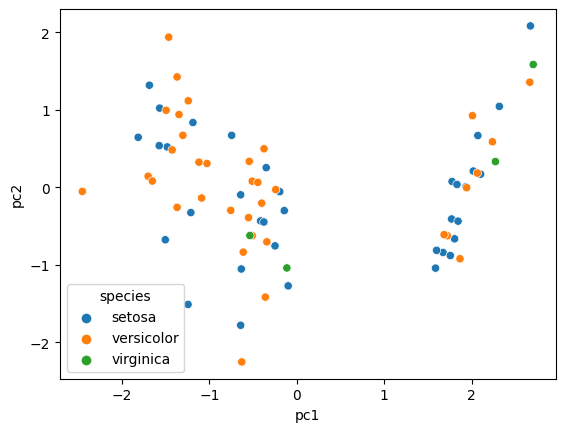

In [ ]:

df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot(x='pc1', y='pc2', hue=df_pca_train['species'], data=df_pca_train);

### Transform the test data

note: Here we only apply the learned transformers to transform the test data, NO fit is used


In [ ]:

X_test_ss = scaler.transform(X_test)

pca_test = pca.transform(X_test_ss)

###Classification

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

classifier.fit(X_train, y_train)
score = accuracy_score(classifier.predict(X_test), y_test)
print('Accuracy before transformation  = {:.2f}'.format(score))

Accuracy before transformation  = 0.91


In [ ]:

classifier.fit(pca_train, y_train)
score = accuracy_score(classifier.predict(pca_test), y_test)
print('Accuracy after PCA transformation  = {:.2f}'.format(score))

Accuracy after PCA transformation  = 0.91


##ICA

Steps are very similar to the scaler and the PCA transformeres.

There are several ICA approaches in fact. We will use sklearn's `Fast ICA` algorithm.

In [ ]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss)  

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


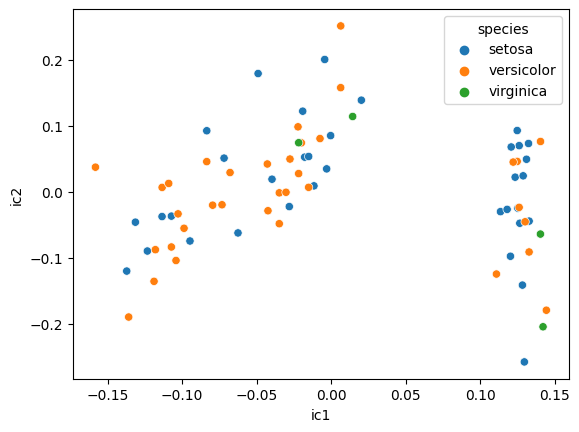

In [ ]:

df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot(x='ic1', y='ic2', hue=df_ica_train['species'], data=df_ica_train);

In [ ]:

classifier.fit(ica_train, y_train)
ica_test = ica.transform(X_test_ss)
score = accuracy_score(classifier.predict(ica_test), y_test)
print('Accuracy after ICA transformation  = {:.2f}'.format(score))

Accuracy after ICA transformation  = 0.93


## GP transformers

In [ ]:

!pip install gplearn

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [ ]:

from gplearn.genetic import SymbolicTransformer
gp = SymbolicTransformer(n_components=2)
gp.fit(X_train_ss, label_encoded)
gp_train = gp.transform(X_train_ss)

<Axes: xlabel='gp1', ylabel='gp2'>

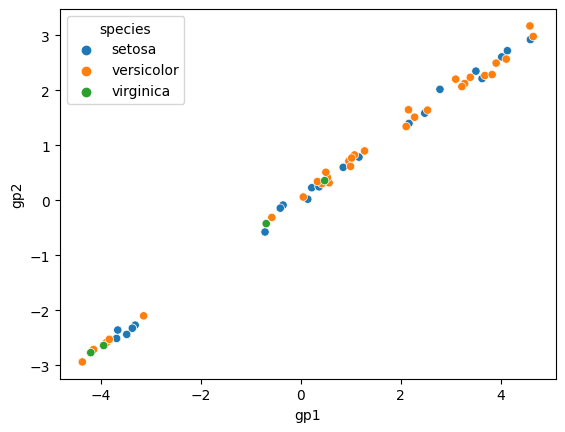

In [ ]:

df_gp_train = pd.DataFrame(data = gp_train, columns = ['gp1', 'gp2'])
df_gp_train['species']=y_train
sns.scatterplot(x='gp1', y='gp2', hue=df_gp_train['species'], data=df_gp_train)

In [ ]:

gp_test = gp.transform(X_test_ss)
df_gp_test = pd.DataFrame(data = gp_test, columns = ['gp1', 'gp2'])
df_gp_test['species']=y_test
classifier.fit(gp_train, y_train)
accuracy_score(classifier.predict(gp_test), y_test)

0.9333333333333333

---
